# Description

Today is the 30 day of war between Russia and Ukraine. Many countries are supporting Ukraine by introducing economic sanctions on Russia. There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. So if you want to analyze the sentiments of people over the Ukraine and Russian War, this article is for you. In this article, I will take you through the task of Ukraine and Russia war Twitter Sentiment Analysis using Python.



# Ukraine Russia War Twitter Sentiment Analysis using Python

The dataset that I am using for the task of Twitter sentiment analysis on the Ukraine and Russia War is downloaded from Kaggle. This dataset was initially collected from Twitter and is updated regularly. You can download this dataset from here. Now let’s import the necessary Python libraries and the dataset to get started with this task:

In [1]:
!pip install nltk

In [2]:
!pip install regex

In [3]:
!pip install strings

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\MOIN\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\MOIN\\AppData\\Local\\Temp\\pip-install-pkkg3t81\\strings_64ffcb2c5fde4a7190c6eec4b0bde9a1\\setup.py'"'"'; __file__='"'"'C:\\Users\\MOIN\\AppData\\Local\\Temp\\pip-install-pkkg3t81\\strings_64ffcb2c5fde4a7190c6eec4b0bde9a1\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\MOIN\AppData\Local\Temp\pip-pip-egg-info-n0tfskyc'
         cwd: C:\Users\MOIN\AppData\Local\Temp\pip-install-pkkg3t81\strings_64ffcb2c5fde4a7190c6eec4b0bde9a1\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\

importing some important module

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [8]:
#importing data
data=pd.read_csv('filename.csv')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1509285688704962563,1509034785544548353,2022-03-30 21:45:24 UTC,2022-03-30,21:45:24,0,856117542804496384,thommohr,Thomas Mohr,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Taus777', 'name': 'Taus', 'i...",NaN,NaN,NaN,NaN
1,1509285688532865028,1502221729313304576,2022-03-30 21:45:23 UTC,2022-03-30,21:45:23,0,1502549391835648000,gabor_adolf,AdolfGáborRamsex292368SA,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GunaSek09459028', 'name': 'G...",NaN,NaN,NaN,NaN
2,1509285686326833155,1509237045092306946,2022-03-30 21:45:23 UTC,2022-03-30,21:45:23,0,136271609,neodroid,Neodroid,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'carlosv96851', 'name': 'carl...",NaN,NaN,NaN,NaN
3,1509285686293278720,1509285686293278720,2022-03-30 21:45:23 UTC,2022-03-30,21:45:23,0,82962053,bong8242co,One of 8B dudes,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1509285685840293892,1509241044600295425,2022-03-30 21:45:23 UTC,2022-03-30,21:45:23,0,1126211690180349952,victori23299367,Viktoria Romanchuk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MikeKellyPA', 'name': 'Rep. ...",NaN,NaN,NaN,NaN


Let’s have a quick look at all the column names of the dataset:

In [9]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward:

In [10]:
data = data[["username", "tweet", "language"]]

Let’s have a look at whether any of these columns contains any null values or not:


In [11]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language:

In [12]:
data["language"].value_counts()

en     8541
pt      355
und     331
it      330
fr      127
ru       51
in       50
es       43
ca       28
de       24
pl       22
ar       13
tr       12
nl       11
ja       11
ro        9
cs        8
hi        7
et        7
tl        7
uk        6
zh        4
ur        3
da        2
sl        2
fi        2
ht        2
sv        2
ta        1
el        1
Name: language, dtype: int64

So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets:

In [13]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

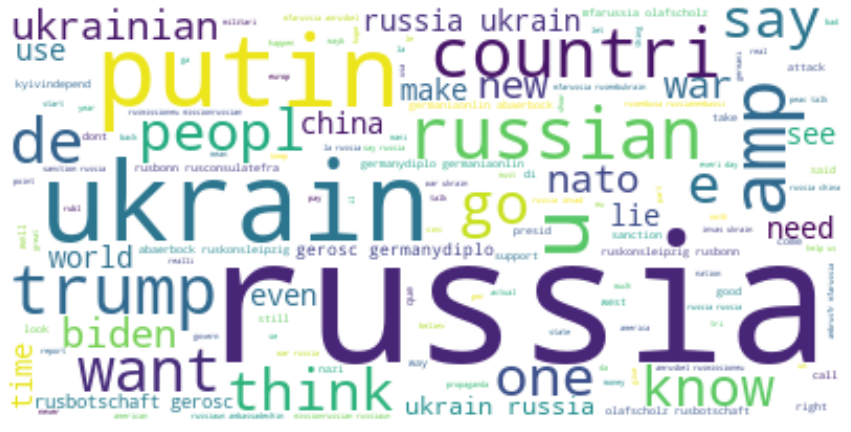

In [15]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:



In [16]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MOIN\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0   mfarussia mfachina  rusembchina xhnew russiau...     0.096     0.069   
1                                    kremlinrussia       0.000     0.000   
2   opapoilo  cnnportug portocanalpt tenho aqui e...     0.000     0.000   
3  think joe biden gonna destroy us manufactur mi...     0.085     0.099   
4  mikekellypa waysandmeansgop ukrainian ask help...     0.000     0.347   

   Neutral  
0    0.836  
1    1.000  
2    1.000  
3    0.817  
4    0.653  


Now let’s have a look at the most frequent words used by people with positive sentiments:

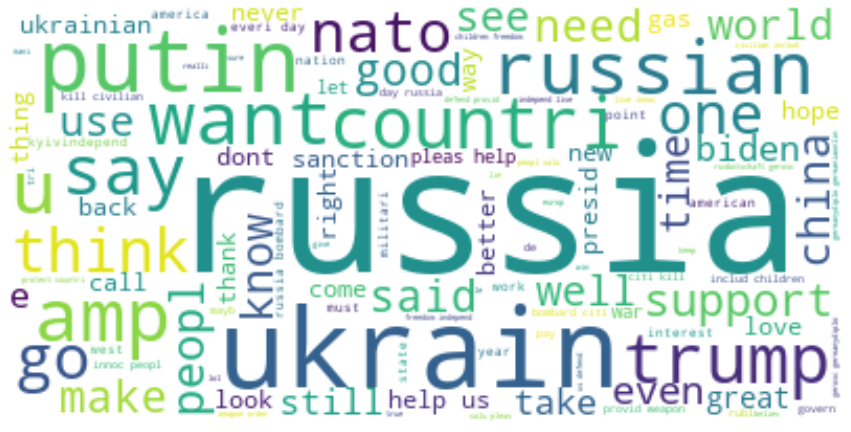

In [17]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most frequent words used by people with negative sentiments:

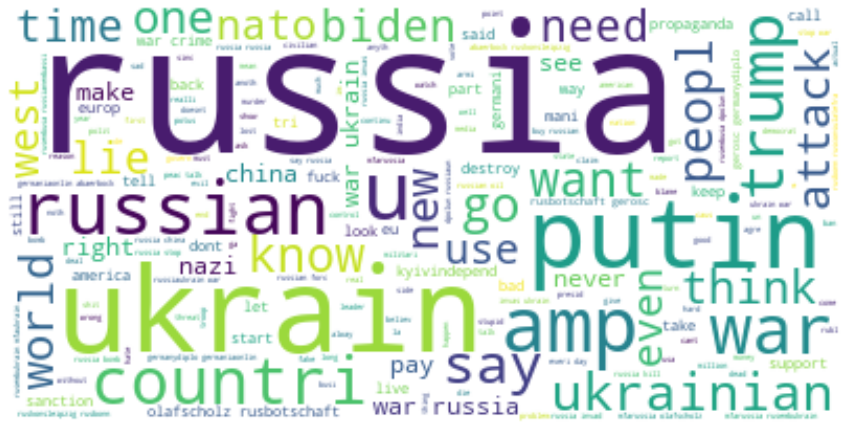

In [18]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

So this is how you can analyze the sentiments of people over the Ukraine and Russia war. I hope this war gets over soon and things get back to normal.

# Summary

There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. I used those tweets for the task of Twitter sentiment analysis on the Ukraine and Russia war. I hope you liked this article. Feel free to ask valuable questions in the comments section below.

